<h1 align="center">Volume 4: Total Variation.</h1>

    Spencer Halverson
    MATH 439
    2022-02-10

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random_integers, uniform, randn
import matplotlib.pyplot as plt
from matplotlib import cm
from imageio import imread, imwrite

# Problem 1

Using 20 x steps, 250 time steps, and a final time of .2, plot the solution that
minimizes (17.4). It should match figure 17.1.

Difference in iterations is  0.0
Final time =  0.2


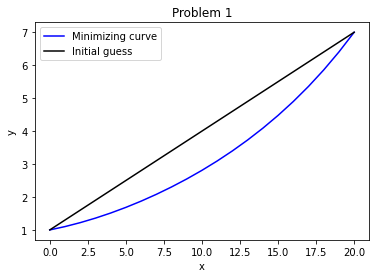

In [11]:
a, b = -1, 1.
alpha, beta = 1., 7.
#### Define variables x_steps, final_T, time_steps ####
x_steps = 20
final_T = 0.2
time_steps = 250


delta_t, delta_x = final_T/time_steps, (b-a)/x_steps
x0 = np.linspace(a,b,x_steps+1)

# Check a stability condition for this numerical method
if delta_t/delta_x**2. > .5:
    print("stability condition fails")

u = np.empty((2,x_steps+1))
u[0] = (beta - alpha)/(b-a)*(x0-a) + alpha
u[1] = (beta - alpha)/(b-a)*(x0-a) + alpha
u_initial = u[0].copy()


def rhs(y):
    # Approximate first and second derivatives to second order accuracy.
    yp = (np.roll(y,-1) - np.roll(y,1))/(2.*delta_x)
    ypp = (np.roll(y,-1) - 2.*y + np.roll(y,1))/delta_x**2.
    # Find approximation for the next time step, using a first order Euler step
    y[1:-1] -= delta_t*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])

# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    rhs(u[1])
    if np.linalg.norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration+=1

print("Difference in iterations is ", np.linalg.norm(np.abs((u[0] - u[1]))))
print("Final time = ", iteration*delta_t)

# Plot
plt.plot(u[0], 'b', label="Minimizing curve")
plt.plot(u_initial, 'k', label="Initial guess")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Problem 1")
plt.legend(loc='best')
plt.show()


# Problem 2

Using 4t = 1e−3, λ = 40, 4x = 1, and 4y = 1, implement the numerical scheme
mentioned above to obtain a solution u. (So Ω = [0, nx] × [0, ny], where nx and ny represent
the number of pixels in the x and y dimensions, respectively.) Take 250 steps in time. Compare
your results with Figure 17.3.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 798 + 1) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 598 + 1) instead
  # This is added back by InteractiveShellApp.init_path()


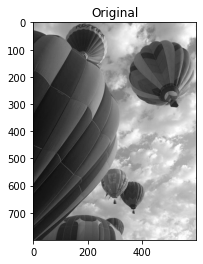

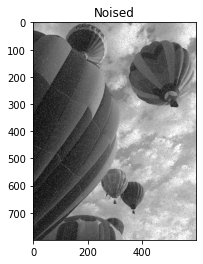

In [30]:
imagename = 'balloons_grey.jpg'
changed_pixels=40000
# Read the image file imagename into an array of numbers, IM
# Multiply by 1. / 255 to change the values so that they are floating point
# numbers ranging from 0 to 1.
IM = imread(imagename, as_gray=True) * (1. / 255)
original = IM.copy()
IM_x, IM_y = IM.shape

for lost in range(changed_pixels):
    x_,y_ = random_integers(1,IM_x-2), random_integers(1,IM_y-2)
    val = .1*randn() + .5
    IM[x_,y_] = max( min(val,1.), 0.)
imwrite("noised_"+imagename, IM)
noised = IM.copy()

plt.imshow(original, cmap='gray')
plt.title("Original")
plt.show()
plt.title("Noised")
plt.imshow(noised, cmap='gray')
plt.show()

stability condition fails
Difference in iterations is  0.0
Final time =  0.25


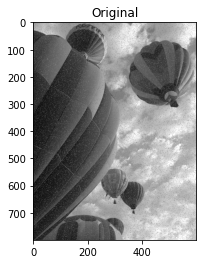

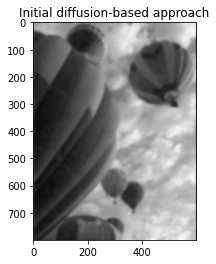

In [40]:
# set variables
ax, bx = 0, 600
ay, by = 0, 800
lamb = 40
alpha, beta = 1., 7.
# there are 800 y pixels and 600 x pixels
x_steps = 600
y_steps = 800
final_T = 0.25
time_steps = 250 # this ensures deltaT = 1e-3


delta_t, delta_x = final_T/time_steps, (b-a)/x_steps
x0 = np.linspace(a,b,x_steps+1)

# Check a stability condition for this numerical method
if delta_t/delta_x**2. > .5:
    print("stability condition fails")

u = np.empty((2,y_steps, x_steps))
u[0] = noised.copy()
u[1] = noised.copy()
u_initial = u[0].copy()


def rhs(u, f):
    # Approximate first and second derivatives to second order accuracy.
    # Since delta x and delta y are 1, we don't need to divide :)
    # u_t = u
    # print(u.shape)
    # print(f.shape)
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0)

    # Find approximation for the next time step, using a first order Euler step
    u[1:-1] -= delta_t*(u[1:-1] - f[1:-1] - lamb*u_xx[1:-1] - lamb*u_yy[1:-1])

# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    rhs(u[1], noised)
    if np.linalg.norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration+=1

print("Difference in iterations is ", np.linalg.norm(np.abs((u[0] - u[1]))))
print("Final time = ", iteration*delta_t)

diffusion = u[1].copy()

# Plot
plt.imshow(u_initial, cmap='gray')
plt.title("Original")
plt.show()
plt.title("Initial diffusion-based approach")
plt.imshow(diffusion, cmap='gray')
plt.show()


# Problem 3

Using 4t = 1e − 3, λ = 1, 4x = 1, and 4y = 1, implement the numerical scheme
mentioned above to obtain a solution u. Take 200 steps in time. Compare your results with
Figure 17.3. How small should ε be?

Difference in iterations is  0.0
Final time =  0.2


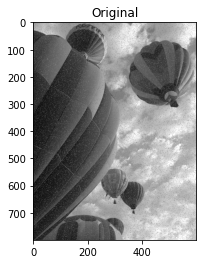

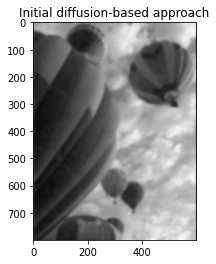

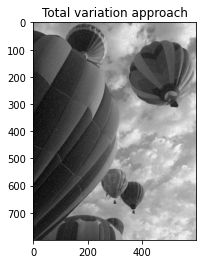

In [48]:
# set variables
ax, bx = 0, 600
ay, by = 0, 800
lamb = 1
# there are 800 y pixels and 600 x pixels
x_steps = 600
y_steps = 800
final_T = 0.2
time_steps = 200 # this ensures deltaT = 1e-3


delta_t, delta_x = final_T/time_steps, 1.

# Check a stability condition for this numerical method
if delta_t/delta_x**2. > .5:
    print("stability condition fails")

u = np.empty((2,y_steps, x_steps))
u[0] = noised.copy()
u[1] = noised.copy()
u_initial = u[0].copy()
eps = 1e-3

def rhs(u, f):
    # Approximate first and second derivatives to second order accuracy.
    # Since delta x and delta y are 1, we don't need to divide :)
    # u_t = u
    # print(u.shape)
    # print(f.shape)
    u_x = (np.roll(u,-1,axis=1) - np.roll(u,1,axis=1))/2
    u_y = (np.roll(u,-1,axis=0) - np.roll(u,1,axis=0))/2
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0)
    u_xy = (np.roll(u_x,-1,axis=0) - np.roll(u_x,1,axis=0))/2.


    # Find approximation for the next time step, using a first order Euler step
    u[1:-1] -= delta_t*lamb*(u[1:-1] - f[1:-1]) - delta_t*(u_xx[1:-1]*(u_y[1:-1]**2) + u_yy[1:-1]*(u_x[1:-1]**2) - 2*u_x[1:-1]*u_y[1:-1]*u_xy[1:-1])/((eps + u_x[1:-1]**2 + u_y[1:-1]**2)**(3/2))

# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    rhs(u[1], noised)
    if np.linalg.norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration+=1

print("Difference in iterations is ", np.linalg.norm(np.abs((u[0] - u[1]))))
print("Final time = ", iteration*delta_t)

# Plot
plt.imshow(u_initial, cmap='gray')
plt.title("Original")
plt.show()
plt.title("Initial diffusion-based approach")
plt.imshow(diffusion, cmap='gray')
plt.show()
plt.title("Total variation approach")
plt.imshow(u[1], cmap='gray')
plt.show()
